In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Word2Vec Model

In [4]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
word2vec_model['awesome']

array([ 7.47070312e-02, -9.03320312e-02, -5.59082031e-02,  1.20117188e-01,
        8.23974609e-03, -3.58886719e-02,  7.22656250e-02, -1.40625000e-01,
       -1.09863281e-01,  2.40234375e-01, -1.68457031e-02, -1.99218750e-01,
        5.32226562e-02, -2.96875000e-01,  7.95898438e-02,  2.15820312e-01,
        2.05078125e-01,  1.36718750e-01, -1.07910156e-01,  4.99725342e-04,
       -1.69677734e-02,  3.69140625e-01,  1.60156250e-01, -3.34472656e-02,
        1.25000000e-01, -2.33398438e-01, -4.37011719e-02,  1.01074219e-01,
        1.38671875e-01, -2.85156250e-01, -5.73730469e-02,  1.77734375e-01,
        2.53906250e-01,  2.96875000e-01,  1.70898438e-01, -9.22851562e-02,
        8.39843750e-02,  1.79443359e-02,  6.83593750e-02,  2.98828125e-01,
        2.83203125e-01, -1.04492188e-01,  3.63281250e-01,  8.25195312e-02,
       -4.80957031e-02, -1.87500000e-01,  7.95898438e-02, -8.85009766e-03,
        3.46679688e-02, -2.24609375e-02,  4.79125977e-03,  2.00195312e-01,
       -2.58789062e-02,  

In [12]:
word2vec_model.most_similar("Perfect")

[('http://www.pwrd.com', 0.591183602809906),
 ('perfect', 0.5136504769325256),
 ('Ideal', 0.5126502513885498),
 ('weatherproof_Jacksonville_Jaguars', 0.5075591802597046),
 ('Diamond_Engagement_Ring', 0.5012430548667908),
 ('Zachary_Levi_Less_Than', 0.49628758430480957),
 ('Amazing', 0.48599687218666077),
 ('Wonderful', 0.48039498925209045),
 ('Good', 0.4792042672634125),
 ("Can't_Miss", 0.4760766923427582)]

In [13]:
word2vec_model.most_similar(positive=['train','vehicle'], negative=['bike'], topn=1)

[('locomotive', 0.5334706902503967)]

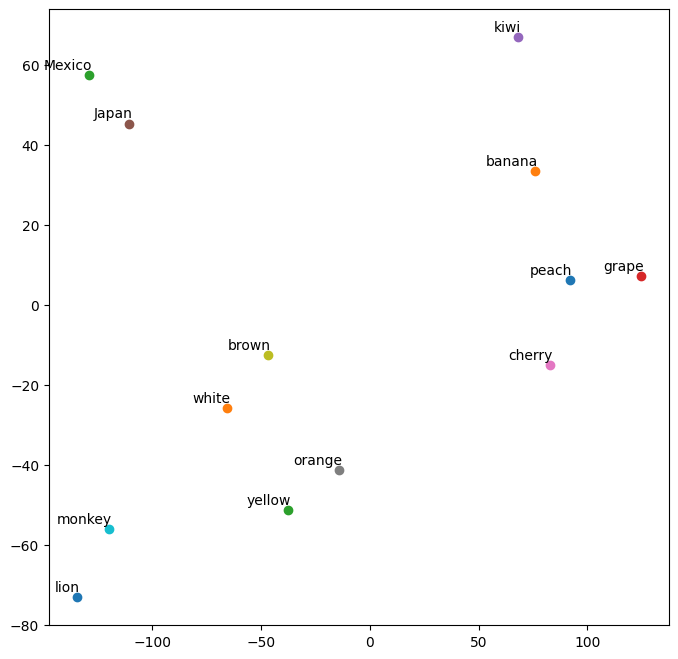

In [15]:
vocab = ["lion", "banana", "yellow", "grape", "kiwi", "Japan", "cherry", "orange", "brown" ,"monkey", "peach","white","Mexico"]

def tsne_plot(model):
  labels = []
  wordvecs = []

  for word in vocab:
    wordvecs.append(model[word])
    labels.append(word)

  wordvecs = np.array(wordvecs)
  # print(wordvecs)
  tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
  coordinates = tsne_model.fit_transform(wordvecs)

  x = []
  y = []

  for i in coordinates:
    x.append(i[0])
    y.append(i[1])

  plt.figure(figsize=(8,8))
  for n in range(len(x)):
    plt.scatter(x[n],y[n])
    plt.annotate(labels[n],
                 xy = (x[n], y[n]),
                 xytext=(2,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
  plt.show()
tsne_plot(word2vec_model)

In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')  # Ensure that NLTK punkt is downloaded for tokenization

# Sample sentences
sentences = [
    "Word embedding is a technique in natural language processing.",
    "It represents words as vectors in a continuous vector space.",
    "Word2Vec is a popular algorithm for learning word embeddings.",
]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Word2Vec model training
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model (optional)
model.save("word2vec_model")

# Example: Get the vector representation of a word
word_vector = model.wv['word']
# print("Vector representation of 'word':", word_vector)

# Example: Find similar words
similar_words = model.wv.most_similar('embedding', topn=3)
print("Words similar to 'embedding':", similar_words)


Words similar to 'embedding': [('word', 0.19914914667606354), ('word2vec', 0.0968651995062828), ('is', 0.07529349625110626)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# GloVe Model

In [21]:
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [22]:
glove_model['amazing']

array([-0.26281  , -0.2569   ,  0.0031634,  0.11116  , -0.26983  ,
        0.13558  , -0.28543  , -0.060975 , -0.25674  , -0.78597  ,
        0.35811  , -0.1795   ,  0.30085  ,  0.81278  ,  0.11718  ,
       -0.21434  , -0.063344 , -0.30954  ,  0.083549 ,  0.39303  ,
       -0.012313 ,  1.1091   ,  0.22048  ,  0.19107  , -0.074628 ,
        0.21337  ,  0.61978  , -0.19951  ,  0.079531 ,  0.31018  ,
       -0.78848  , -0.096041 , -0.52462  , -0.55647  , -0.57361  ,
        0.96709  ,  0.13452  ,  0.074389 ,  0.46333  ,  0.022875 ,
        0.248    , -0.43702  , -0.25498  , -0.13667  ,  0.10111  ,
        0.039904 ,  0.39554  , -0.3251   ,  0.18856  ,  0.12483  ,
       -0.03102  , -0.14792  ,  0.088878 , -0.46753  , -0.29664  ,
       -0.29665  , -0.39773  , -0.49484  ,  0.38035  , -0.4317   ,
        0.13379  , -0.33609  , -0.05571  ,  0.23502  , -0.40195  ,
        0.038404 ,  0.6067   ,  0.0089394,  0.26301  ,  0.2463   ,
       -0.47756  , -0.01401  ,  0.061908 , -0.19561  ,  0.5615

In [33]:
glove_model.most_similar('isro')

[('drdo', 0.5750523209571838),
 ('madhavan', 0.5613799095153809),
 ('kasturirangan', 0.5185132026672363),
 ('suparco', 0.4721439778804779),
 ('pslv', 0.43939876556396484),
 ('cnes', 0.43275976181030273),
 ('radhakrishnan', 0.4205898940563202),
 ('gslv', 0.41348451375961304),
 ('csiro', 0.4113711416721344),
 ('tanegashima', 0.39755627512931824)]

In [43]:
glove_model.most_similar(positive=['boy','dracula'], negative=['girl'], topn=1)

[('frankenstein', 0.5326064229011536)]

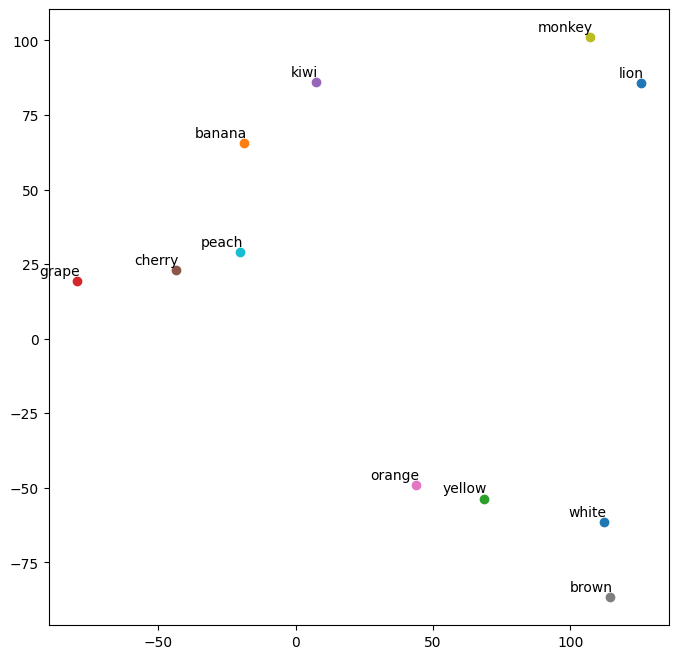

In [46]:
vocab = ["lion", "banana", "yellow", "grape", "kiwi", "cherry", "orange", "brown" ,"monkey", "peach","white"]

def tsne_plot(model):
  labels = []
  wordvecs = []

  for word in vocab:
    wordvecs.append(model[word])
    labels.append(word)

  wordvecs = np.array(wordvecs)
  # print(wordvecs)
  tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
  coordinates = tsne_model.fit_transform(wordvecs)

  x = []
  y = []

  for i in coordinates:
    x.append(i[0])
    y.append(i[1])

  plt.figure(figsize=(8,8))
  for n in range(len(x)):
    plt.scatter(x[n],y[n])
    plt.annotate(labels[n],
                 xy = (x[n], y[n]),
                 xytext=(2,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
  plt.show()
tsne_plot(glove_model)